<a href="https://colab.research.google.com/github/FadeZx/DT-467_ChessMoveTracking/blob/PieceDetection/2_2024_DT_467_ChessMove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset preparation / Preprocessing

In [ ]:
#import dataset1 no oriented
!pip install -U gdown
!gdown --folder https://drive.google.com/drive/folders/1-NaFCqOomOCt5EpskeDT7ez1_DZ_8k3m

Retrieving folder contents
Processing file 1sw65JD2BTd6b24ZpiMPrdlT8ckvBI1hq frame0.jpg
Processing file 1U1DJyDGWuZTt6NWBym1LsdVNK2yIwYkX frame55.jpg
Processing file 1fPd0Lz1UfnW9_upQgWLJ88GTQgB-mPZE frame56.jpg
Processing file 1kGfo6dLN1r7jxE1I9gkHV6yg4zkc5UtW frame57.jpg
Processing file 1xfroP4wMUfdZQmhCnuMHlStbhnxgfY-t frame58.jpg
Processing file 1tvoxfNZ2GMn8AXzukujHpGgRf7MnVTcO frame59.jpg
Processing file 1dSX1jhIAd2Qzhn2H1Vg_EeQsdZPZKTVh frame65.jpg
Processing file 1YUHENekfVEOntvmrjN3YVw78W5YpIGoQ frame66.jpg
Processing file 1U4_aK_ElkDd5jLTmnL8ErH0AjTzmB0zH frame70.jpg
Processing file 1sVsDBEOa3P-bUaL3fLpQxiVjM7cFB4oW frame75.jpg
Processing file 1oaQ2XhaxxuQIN21uQd89L7o5PTHA9C_v frame101.jpg
Processing file 1dgHlb1EYu1hEqm_axz1ODmwqIlCSPZrT frame155.jpg
Processing file 15jYU9ZE6YIAI4acgKym5tmzadMoPE93U frame159.jpg
Processing file 1g3JN_NMHdPKmwrME2q9ff6PIrM5Q0f85 frame173.jpg
Processing file 182W7crKEvSJXevr0Jye3eLZCRknwvM22 frame183.jpg
Processing file 1hUuj4SuLqMOyzrrFAggJtS

In [ ]:
#import dataset2
!wget https://drive.google.com/uc?id=1PVeMgv5z_Ua3T33htKAFX27jkkOPHTM_ -O frame_0.jpg
!wget https://drive.google.com/uc?id=1vE7q6qMD_xz8dAvpcEYHL1zC1CspNwPa -O frame_25.jpg
!wget https://drive.google.com/uc?id=1METUm9TQIcKrt-T-1IUDBV_AABLlKct0 -O frame_98.jpg
!wget https://drive.google.com/uc?id=1AnbrrLArLNQMsFsaLytmqi7L_YQ7tiSV -O frame_160.jpg
!wget https://drive.google.com/uc?id=18RpEPCsn4FUu4qOX3ZHPcJL2MMAPj9vk -O frame_212.jpg
!wget https://drive.google.com/uc?id=19RXLuPMF11k3_0ExXxtC69o0yY4uQF4y -O frame_386.jpg
!wget https://drive.google.com/uc?id=11QnEx8AlLdcIMJZPeCY_Gb8YzB4i_rrs -O frame_471.jpg
!wget https://drive.google.com/uc?id=1asMzKguloR7uNA6kB5JpFki2SaFL8f7K -O frame_935.jpg
!wget https://drive.google.com/uc?id=1Js08IbU-jfzT7q960kIOWXHV4YcSgK1w -O frame_1149.jpg
!wget https://drive.google.com/uc?id=1jV00hYmoqeOW8cJgvp-LdJYJgfstMONm-O frame_1183.jpg

--2025-04-27 17:51:53--  https://drive.google.com/uc?id=1PVeMgv5z_Ua3T33htKAFX27jkkOPHTM_
Resolving drive.google.com (drive.google.com)... 142.250.4.113, 142.250.4.139, 142.250.4.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.4.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1PVeMgv5z_Ua3T33htKAFX27jkkOPHTM_ [following]
--2025-04-27 17:51:54--  https://drive.usercontent.google.com/download?id=1PVeMgv5z_Ua3T33htKAFX27jkkOPHTM_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.200.132, 2404:6800:4003:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.200.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198855 (194K) [image/jpeg]
Saving to: ‘frame_0.jpg’

frame_0.jpg         100%[===================>] 194.19K  --.-KB/s    in 0.003s  

2025-04-27 17:51:57 (71.2 MB/s) - ‘frame_0.jpg’ saved

In [ ]:
def order_points(pts):
    # pts is a list of 4 (x, y) tuples
    rect = np.zeros((4, 2), dtype="float32")

    # top-left has the smallest sum, bottom-right the largest
    s = np.sum(pts, axis=1)
    rect[0] = pts[np.argmin(s)]  # top-left
    rect[2] = pts[np.argmax(s)]  # bottom-right

    # top-right has smallest difference, bottom-left the largest
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]  # top-right
    rect[3] = pts[np.argmax(diff)]  # bottom-left

    return rect


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("dataset1_nolabel/frame0.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Set the internal number of corners (for 8x8 board → 7x7 internal corners)
pattern_size = (7, 7)

# Try to find the corners
found, corners = cv2.findChessboardCorners(gray, pattern_size)

# Visualize result
if found:
    img_drawn = cv2.drawChessboardCorners(img.copy(), pattern_size, corners, found)
    plt.imshow(cv2.cvtColor(img_drawn, cv2.COLOR_BGR2RGB))
    plt.title("Detected Chessboard Corners")
    plt.axis("off")
    plt.show()
else:
    print("Chessboard corners not found.")

Chessboard corners not found.


# Chess Piece Detection

In [43]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [44]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [42]:
from roboflow import Roboflow
rf = Roboflow(api_key="wwaFUSeAIZGOcoFOrd6n")
project = rf.workspace("chess-project-dm31c").project("chess-full-21f0i")
version = project.version(4)
dataset = version.download("yolov11")


ModuleNotFoundError: No module named 'roboflow'

In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

#frames to predit/testing
image_paths = [
    "frame_0.jpg",
    "frame_25.jpg",
    "frame_98.jpg",
    "frame_160.jpg",
    "frame_212.jpg",
    "frame_386.jpg",
    "frame_471.jpg",
    "frame_935.jpg",
    "frame_1149.jpg",
    "frame_1183.jpg"
]


model.train(
  data=dataset.location + "/data.yaml",
  epochs=80,
  imgsz=640,
  batch=16
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 126MB/s]


Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Chess-Pieces-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

100%|██████████| 755k/755k [00:00<00:00, 21.4MB/s]

Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

YOLO11n summary: 181 layers, 2,592,180 parameters, 2,592,164 gradients, 6.5 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1120.6±578.3 MB/s, size: 41.7 KB)


train: Scanning /content/Chess-Pieces-3/train/labels... 1659 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1659/1659 [00:00<00:00, 2305.44it/s]

train: /content/Chess-Pieces-3/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.05143d8a4b85d12b5511562894393599.jpg: 1 duplicate labels removed
train: /content/Chess-Pieces-3/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.9ab9c9417437ca6a8ff6994196235ff6.jpg: 1 duplicate labels removed
train: /content/Chess-Pieces-3/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.dde36ac157e6acfb3629b1478f2d6363.jpg: 1 duplicate labels removed
train: New cache created: /content/Chess-Pieces-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 608.0±412.2 MB/s, size: 50.5 KB)


val: Scanning /content/Chess-Pieces-3/valid/labels... 157 images, 0 backgrounds, 0 corrupt: 100%|██████████| 157/157 [00:00<00:00, 1169.66it/s]

val: New cache created: /content/Chess-Pieces-3/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.71G      1.684      3.616      1.181        187        640: 100%|██████████| 104/104 [00:36<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        157        739      0.649       0.14      0.302      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.73G      1.547       2.19      1.119        133        640: 100%|██████████| 104/104 [00:30<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        157        739      0.374      0.579      0.475      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.75G      1.481      1.819      1.119        100        640: 100%|██████████| 104/104 [00:29<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]

                   all        157        739       0.43      0.661      0.581      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.76G      1.521      1.659       1.14        158        640: 100%|██████████| 104/104 [00:29<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]

                   all        157        739       0.67      0.745      0.753      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.78G      1.442      1.491      1.124        191        640: 100%|██████████| 104/104 [00:29<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.77it/s]

                   all        157        739      0.669      0.817      0.811      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.79G      1.433      1.352      1.117        140        640: 100%|██████████| 104/104 [00:28<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.73it/s]

                   all        157        739      0.736      0.789      0.854      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.81G      1.378      1.225      1.104         78        640: 100%|██████████| 104/104 [00:30<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.63it/s]

                   all        157        739      0.858      0.876      0.936      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.82G      1.377      1.172      1.098        117        640: 100%|██████████| 104/104 [00:28<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]

                   all        157        739      0.851      0.866      0.924      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.84G      1.369      1.116      1.098        121        640: 100%|██████████| 104/104 [00:30<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]

                   all        157        739      0.819      0.881      0.916       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.85G      1.342      1.086      1.082         94        640: 100%|██████████| 104/104 [00:29<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]

                   all        157        739      0.863      0.919      0.945      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.86G      1.324      1.032      1.079         73        640: 100%|██████████| 104/104 [00:29<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]

                   all        157        739      0.873      0.866      0.931      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.88G      1.349      1.007      1.087         13        640: 100%|██████████| 104/104 [00:29<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]

                   all        157        739      0.889      0.893      0.948       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.89G      1.339     0.9501       1.09         87        640: 100%|██████████| 104/104 [00:29<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]

                   all        157        739      0.913      0.933      0.969      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.91G      1.307     0.9346      1.079         84        640: 100%|██████████| 104/104 [00:30<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]

                   all        157        739      0.925      0.909      0.964      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.92G      1.324      0.908      1.083         95        640: 100%|██████████| 104/104 [00:29<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.64it/s]

                   all        157        739      0.896      0.901      0.951      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.94G      1.294      0.874      1.077         95        640: 100%|██████████| 104/104 [00:30<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]

                   all        157        739      0.938      0.905      0.965      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.95G      1.318     0.9035      1.089         57        640: 100%|██████████| 104/104 [00:29<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.83it/s]

                   all        157        739      0.893      0.863      0.941      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.97G      1.278     0.8638      1.072        105        640: 100%|██████████| 104/104 [00:30<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]

                   all        157        739       0.94      0.921      0.965      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.98G      1.301      0.851      1.079        110        640: 100%|██████████| 104/104 [00:29<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]

                   all        157        739      0.926      0.929      0.969      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         3G       1.27     0.8269      1.072        140        640: 100%|██████████| 104/104 [00:29<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        157        739      0.918      0.907      0.964      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.21G       1.26       0.81      1.062         92        640: 100%|██████████| 104/104 [00:29<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.74it/s]

                   all        157        739      0.931      0.933      0.966      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.22G       1.29     0.8108      1.077        108        640: 100%|██████████| 104/104 [00:29<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.71it/s]

                   all        157        739      0.953      0.953      0.979      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.24G      1.268     0.7827      1.074        107        640: 100%|██████████| 104/104 [00:30<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]

                   all        157        739      0.946      0.947      0.976      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.26G      1.276     0.7796      1.075         48        640: 100%|██████████| 104/104 [00:28<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]

                   all        157        739      0.915      0.929      0.971      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.27G      1.258     0.7629      1.071         85        640: 100%|██████████| 104/104 [00:29<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        157        739      0.923      0.924      0.968      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.29G      1.243     0.7523      1.063         48        640: 100%|██████████| 104/104 [00:28<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]

                   all        157        739      0.948      0.938      0.979      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       3.3G      1.227     0.7249      1.059        113        640: 100%|██████████| 104/104 [00:29<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]

                   all        157        739      0.918      0.963      0.978      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.31G      1.239     0.7468      1.062         96        640: 100%|██████████| 104/104 [00:29<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.85it/s]

                   all        157        739      0.933      0.948      0.975      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.33G      1.224     0.7108      1.061         98        640: 100%|██████████| 104/104 [00:29<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]

                   all        157        739      0.954      0.926      0.974      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.34G      1.217     0.7178      1.052        155        640: 100%|██████████| 104/104 [00:29<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]

                   all        157        739       0.95      0.952      0.983      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.36G       1.23     0.7281      1.051         48        640: 100%|██████████| 104/104 [00:30<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]

                   all        157        739      0.909      0.907      0.961      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.37G      1.215     0.7056      1.057        115        640: 100%|██████████| 104/104 [00:30<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        157        739      0.956      0.932       0.98      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.39G      1.219     0.6999      1.056        135        640: 100%|██████████| 104/104 [00:28<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]

                   all        157        739      0.955      0.943      0.978      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       3.4G      1.212     0.6874      1.048         96        640: 100%|██████████| 104/104 [00:29<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]

                   all        157        739       0.95      0.924      0.976      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.42G      1.205     0.6887       1.05         75        640: 100%|██████████| 104/104 [00:30<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.79it/s]

                   all        157        739      0.958       0.96      0.984      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.43G      1.207     0.6921      1.045        128        640: 100%|██████████| 104/104 [00:29<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.91it/s]

                   all        157        739      0.953      0.948       0.98      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.45G      1.204     0.6683      1.051         91        640: 100%|██████████| 104/104 [00:30<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]

                   all        157        739      0.957       0.94      0.975      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.67G      1.185     0.6673       1.04         79        640: 100%|██████████| 104/104 [00:29<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]

                   all        157        739       0.96      0.945      0.983      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.68G      1.205     0.6642      1.045        138        640: 100%|██████████| 104/104 [00:29<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]

                   all        157        739      0.946      0.923      0.977      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       3.7G      1.186     0.6544      1.039         62        640: 100%|██████████| 104/104 [00:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]

                   all        157        739      0.958      0.948       0.98      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.71G      1.163     0.6343      1.032         32        640: 100%|██████████| 104/104 [00:32<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]

                   all        157        739      0.965      0.955      0.984      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.72G      1.154     0.6282      1.028        111        640: 100%|██████████| 104/104 [00:30<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.86it/s]

                   all        157        739      0.966      0.953      0.985      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.74G       1.17     0.6322      1.031         48        640: 100%|██████████| 104/104 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]

                   all        157        739      0.965      0.953      0.978      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.75G      1.177     0.6347      1.031         76        640: 100%|██████████| 104/104 [00:30<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]

                   all        157        739      0.953      0.979      0.987      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.77G      1.166     0.6221      1.041         60        640: 100%|██████████| 104/104 [00:30<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]

                   all        157        739      0.938      0.946      0.971      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.78G       1.17     0.6297      1.031        136        640: 100%|██████████| 104/104 [00:30<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]

                   all        157        739      0.971      0.972      0.987      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       3.8G      1.159     0.6154      1.031        173        640:  55%|█████▍    | 57/104 [00:17<00:14,  3.20it/s]

# Visualization

In [ ]:
model_eval = YOLO("runs/detect/train/weights/best.pt")

In [ ]:
weight = model_eval.val(
    data="/content/Chess-Pieces-3/data.yaml",
    split='test'
)

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 620.8±230.3 MB/s, size: 50.0 KB)


val: Scanning /content/Chess-Pieces-3/test/labels... 77 images, 1 backgrounds, 0 corrupt: 100%|██████████| 77/77 [00:00<00:00, 1914.11it/s]

val: New cache created: /content/Chess-Pieces-3/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


                   all         77        608      0.969      0.972      0.976      0.822
          black-bishop         21         35      0.956      0.971       0.98      0.812
            black-king         25         25      0.992       0.96      0.978      0.829
          black-knight         25         41      0.926          1      0.976      0.818
            black-pawn         27        126      0.992      0.972      0.989      0.819
           black-queen         27         34      0.965      0.971      0.965      0.819
            black-rook         27         46          1      0.998      0.995      0.855
          white-bishop         25         40      0.965          1      0.994      0.841
            white-king         22         22      0.894      0.955      0.951      0.829
          white-knight         26         46          1      0.943      0.969      0.802
            white-pawn         29        124          1      0.993      0.995      0.825
           white-quee

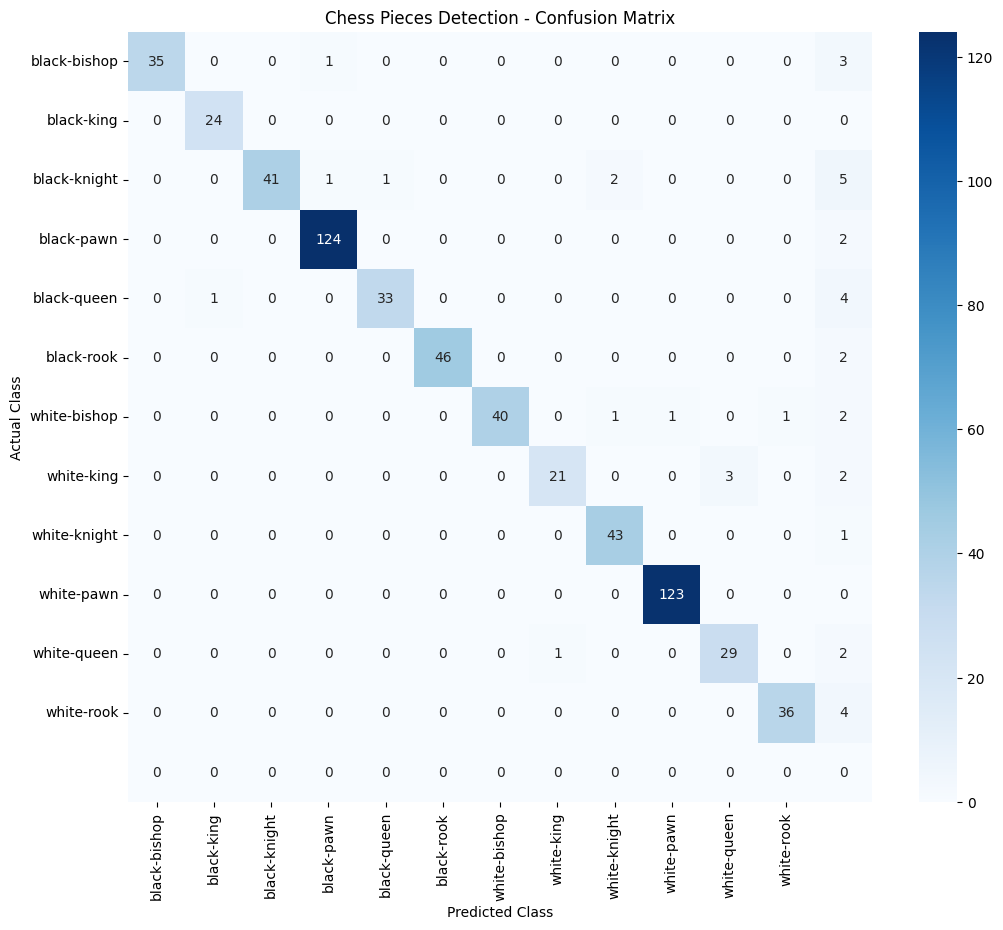

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

classes = [
    'black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook',
    'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook'
]

plt.figure(figsize=(12, 10))
sns.heatmap(weight.confusion_matrix.matrix, annot=True, fmt=".0f", cmap="Blues",
            xticklabels=classes, yticklabels=classes)

plt.title('Chess Pieces Detection - Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [ ]:
import cv2
from PIL import Image


def visualize_yolo_predictions(results, image_path=None, figsize=(10, 10)):
    """
    Visualizes YOLO predictions with centered smaller labels inside the boxes.
    """

    # Load image
    if image_path:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        image = results[0].orig_img.copy()

    # Loop through each detection
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cls_id = int(box.cls[0])
        label = results[0].names[cls_id]

        label_text = f"{label} {conf:.2f}"

        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

        # Calculate the center point of the box
        center_x = int((x1 + x2) / 2)
        center_y = int((y1 + y2) / 2)

        # Draw label text inside the box, centered
        font_scale = 0.6   # Smaller text
        thickness = 2
        text_size, _ = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
        text_w, text_h = text_size

        # Adjust so that text is centered
        text_x = center_x - text_w // 2
        text_y = center_y + text_h // 2

        cv2.putText(image, label_text, (text_x, text_y),
                    cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)

    # Show the image
    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.axis("off")
    plt.title("YOLO Predictions", fontsize=16)
    plt.show()



In [ ]:
def visualize_yolo_predictions(results, image_path=None, figsize=(10, 10)):
    """
    Visualizes YOLO predictions with centered small red labels (only class name) inside the boxes.
    """

    # Load image
    if image_path:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        image = results[0].orig_img.copy()

    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        label = results[0].names[cls_id]

        # Only show the class name, no confidence number
        label_text = f"{label}"

        # Draw bounding box (green)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Centered label near bottom
        font_scale = 0.5   # Smaller text
        thickness = 1
        text_size, _ = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
        text_w, text_h = text_size

        center_x = int((x1 + x2) / 2)
        text_x = center_x - text_w // 2
        text_y = y2 - 6  # 5 pixels above bottom

        # Draw label (red text)
        cv2.putText(image, label_text, (text_x, text_y),
                    cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), thickness, cv2.LINE_AA)

    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.axis("off")
    plt.title("YOLO Predictions", fontsize=16)
    plt.show()


image 1/1 /content/dataset1_nolabel/frame0.jpg: 640x384 2 black-bishops, 2 black-kings, 4 black-knights, 5 black-pawns, 1 black-queen, 1 black-rook, 1 white-bishop, 1 white-king, 2 white-knights, 7 white-pawns, 2 white-queens, 2 white-rooks, 12.4ms
Speed: 3.1ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


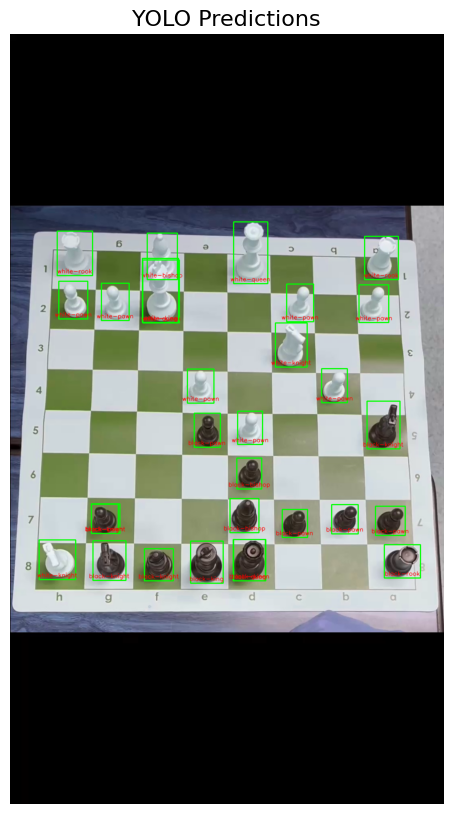

In [ ]:
results = model.predict("/content/dataset1_nolabel/frame0.jpg", imgsz=640)
visualize_yolo_predictions(results)

In [1]:
pip install python-chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chess: filename=chess-1.11.2-py3-none-any.whl size=147775 sha256=557827e56dfab438d335bd82aceff392b2384886bf70bf61bc54654c5fd4b072
  Stored in directory: /root/.cache/pip/wheels/fb/5d/5c/59a62d8a695285e59ec9c1f66add6f8a9ac4152499a2be0113
Successfully built chess


In [69]:
import chess
import chess.svg
import chess.pgn

board = chess.Board()

first_mover_color = None
first_move_made = False

piece_to_fen = {
    'white-pawn': 'P',
    'white-knight': 'N',
    'white-bishop': 'B',
    'white-rook': 'R',
    'white-queen': 'Q',
    'white-king': 'K',
    'black-pawn': 'p',
    'black-knight': 'n',
    'black-bishop': 'b',
    'black-rook': 'r',
    'black-queen': 'q',
    'black-king': 'k',
}

def create_fen_from_array(board_array):
    fen_rows = []
    for row in board_array:
        fen_row = ''
        empty_count = 0
        for cell in row:
            if cell == 'None':
                empty_count += 1
            else:
                if empty_count > 0:
                    fen_row += str(empty_count)
                    empty_count = 0
                fen_row += piece_to_fen[cell]
        if empty_count > 0:
            fen_row += str(empty_count)
        fen_rows.append(fen_row)
    fen_position = '/'.join(fen_rows)

    return fen_position

def coords_to_square(row, col):
    # Chessboard indexing: row 0 = rank 8, col 0 = file 'a'
    file = chr(ord('a') + col)
    rank = str(8 - row)
    return file + rank

def find_move(before, after):
    move_from = None
    move_to = None
    moved_piece = None

    for i in range(len(before)):
        for j in range(len(before[i])):
            if before[i][j] != after[i][j]:
                if before[i][j] != 'None' and after[i][j] == 'None':
                    move_from = (i, j)
                    moved_piece = before[i][j]
                elif before[i][j] == 'None' and after[i][j] != 'None':
                    move_to = (i, j)

    return move_from, move_to, moved_piece


def handle_move(before, after):
    global board, first_mover_color, first_move_made

    move_from, move_to, moved_piece = find_move(before, after)

    #no move detected, exit
    if move_from is None or move_to is None:
        return

    from_square = coords_to_square(*move_from)
    to_square = coords_to_square(*move_to)
    uci_move = from_square + to_square

    # Setup first move if needed
    if not first_move_made:
        if moved_piece.startswith('white'):
            first_mover_color = 'white'
        elif moved_piece.startswith('black'):
            first_mover_color = 'black'
        else:
            raise ValueError("Unknown piece color!")

        # Create and set the FEN based on the first before_board
        fen = create_fen_from_array(before)
        board.set_board_fen(fen)

        # Adjust turn if needed
        if first_mover_color == 'white':
            board.turn = chess.WHITE
        else:
            board.turn = chess.BLACK

        first_move_made = True
        print(f"First mover detected: {first_mover_color}")
        print(f"FEN set: {fen}")

    print(f"Move detected: {uci_move}")

    move = chess.Move.from_uci(uci_move)
    if move in board.legal_moves:
        board.push(move)
    else:
        print("Illegal move detected:", move)


In [70]:
before_board = [
    ['black-rook', 'black-knight', 'black-bishop', 'black-queen', 'black-king', 'black-bishop', 'black-knight', 'black-rook'],
    ['black-pawn', 'black-pawn', 'black-pawn', 'black-pawn', 'black-pawn', 'black-pawn', 'black-pawn', 'black-pawn'],
    ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'],
    ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'],
    ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'],
    ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'],
    ['white-pawn', 'white-pawn', 'white-pawn', 'white-pawn', 'white-pawn', 'white-pawn', 'white-pawn', 'white-pawn'],
    ['white-rook', 'white-knight', 'white-bishop', 'white-queen', 'white-king', 'white-bishop', 'white-knight', 'white-rook']
]


after_board = [
    ['black-rook', 'black-knight', 'black-bishop', 'black-queen', 'black-king', 'black-bishop', 'black-knight', 'black-rook'],
    ['black-pawn', 'black-pawn', 'black-pawn', 'black-pawn', 'black-pawn', 'black-pawn', 'black-pawn', 'black-pawn'],
    ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'],
    ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'],
    ['None', 'None', 'None', 'None', 'white-pawn', 'None', 'None', 'None'],  # pawn now here (e4)
    ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'],
    ['white-pawn', 'white-pawn', 'white-pawn', 'white-pawn', 'None', 'white-pawn', 'white-pawn', 'white-pawn'],  # no pawn on e2 anymore
    ['white-rook', 'white-knight', 'white-bishop', 'white-queen', 'white-king', 'white-bishop', 'white-knight', 'white-rook']
]

handle_move(before_board, after_board)

First mover detected: white
FEN set: rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR
Move detected: e2e4


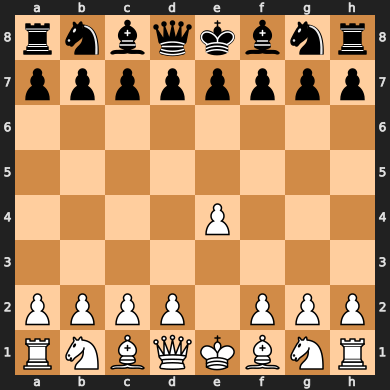

In [71]:
from IPython.display import display, SVG

# Display the board in SVG format
display(SVG(chess.svg.board(board=board)))

# Save the SVG file
with open("chess_board.svg", "w") as f:
    f.write(chess.svg.board(board=board))

Move detected: e7e5


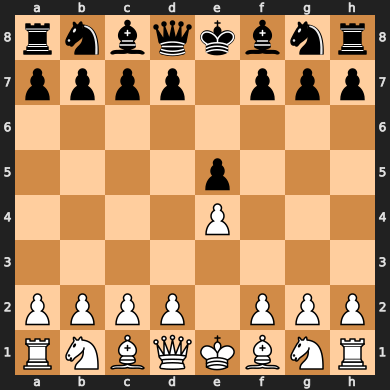

In [72]:
before_board_black = [
    ['black-rook', 'black-knight', 'black-bishop', 'black-queen', 'black-king', 'black-bishop', 'black-knight', 'black-rook'],
    ['black-pawn', 'black-pawn', 'black-pawn', 'black-pawn', 'black-pawn', 'black-pawn', 'black-pawn', 'black-pawn'],
    ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'],
    ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'],
    ['None', 'None', 'None', 'None', 'white-pawn', 'None', 'None', 'None'],
    ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'],
    ['white-pawn', 'white-pawn', 'white-pawn', 'white-pawn', 'None', 'white-pawn', 'white-pawn', 'white-pawn'],
    ['white-rook', 'white-knight', 'white-bishop', 'white-queen', 'white-king', 'white-bishop', 'white-knight', 'white-rook']
]

after_board_black = [
    ['black-rook', 'black-knight', 'black-bishop', 'black-queen', 'black-king', 'black-bishop', 'black-knight', 'black-rook'],
    ['black-pawn', 'black-pawn', 'black-pawn', 'black-pawn', 'None', 'black-pawn', 'black-pawn', 'black-pawn'],  # e7 pawn moved
    ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'],
    ['None', 'None', 'None', 'None', 'black-pawn', 'None', 'None', 'None'],
    ['None', 'None', 'None', 'None', 'white-pawn', 'None', 'None', 'None'],
    ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'],
    ['white-pawn', 'white-pawn', 'white-pawn', 'white-pawn', 'None', 'white-pawn', 'white-pawn', 'white-pawn'],
    ['white-rook', 'white-knight', 'white-bishop', 'white-queen', 'white-king', 'white-bishop', 'white-knight', 'white-rook']
]

handle_move(before_board_black, after_board_black)

display(SVG(chess.svg.board(board=board)))

In [73]:
# Generate PGN
game = chess.pgn.Game()
game.headers["Event"] = "Example Game"

node = game

# Replay moves from the board
for move in board.move_stack:
    node = node.add_variation(move)

# Print the PGN
print(game)

[Event "Example Game"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "?"]
[Black "?"]
[Result "*"]

1. e4 e5 *


# Main

In [ ]:
# This function will be used for marking, do not change function name, input parameters and return parameters of this function
import cv2
import matplotlib.pyplot as plt
import numpy as np



def chess_move(video_name):
  # Input : video filename (.mp4)
  # Output : Chess moves for each video
  moves = ""
  i = 0

  # Create a VideoCapture object
  cap = cv2.VideoCapture(video_name)

  # Check if the video opened successfully
  if not cap.isOpened():
      print("Error opening video file")

  # Read and display frames until the video ends or 'q' is pressed
  while cap.isOpened():
    ret, frame = cap.read()
    if ret and i == 0:
        # Display only the first frame
        plt.imshow(frame[:,:,::-1])
        i += 1
    else:
        break

    # Release the video capture object and close display windows
    cap.release()

    # Write your code here to extract the move from the image

  return moves

# Marking

In [ ]:
!pip install editdistance
!pip install opencv-python

In [ ]:
!wget https://drive.google.com/uc?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR -O chess_solution_final_seen.csv

--2025-04-22 04:27:22--  https://drive.google.com/uc?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR
Resolving drive.google.com (drive.google.com)... 173.194.174.138, 173.194.174.139, 173.194.174.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.174.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR [following]
--2025-04-22 04:27:23--  https://drive.usercontent.google.com/download?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.189.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 963 [application/octet-stream]
Saving to: ‘chess_solution_final_seen.csv’

chess_solution_fina 100%[===================>]     963  --.-KB/s    in 0s      

2025-04-22 04:27:26 (40

## Download .mp4 file

In [ ]:
import subprocess

def download_file(url, filename=None):
    """
    Downloads a file from the specified URL using wget.

    Parameters:
        url (str): The URL of the file to download.
        output_directory (str, optional): The directory to save the downloaded file.
    """
    # Construct the wget command
    cmd = ['wget', url]
    if filename:
        cmd.extend(['-O', filename])

    try:
        # Execute the wget command
        print(cmd)
        subprocess.run(cmd, check=True)
        print(f"Downloaded {url} successfully.")
    except subprocess.CalledProcessError as e:
        print(f"An error occurred: {e}")


In [ ]:
# Load videos (or you can upload videos here manually)
f = open('chess_solution_final_seen.csv','r')

for line in f:
  video_name, moves_sol, p,link = line.split(',')
  idx = link.find('/d/')
  idx2 = link.find('/',idx+3)
  print(link[idx+3:idx2])
  url = 'https://drive.google.com/uc?id=' + link[idx+3:idx2]
  download_file(url, video_name)



nk
['wget', 'https://drive.google.com/uc?id=nk', '-O', 'row_id']
An error occurred: Command '['wget', 'https://drive.google.com/uc?id=nk', '-O', 'row_id']' returned non-zero exit status 8.
182pRqfn8ooNudYhsndYWgyBNi7rAV659
['wget', 'https://drive.google.com/uc?id=182pRqfn8ooNudYhsndYWgyBNi7rAV659', '-O', '2_Move_rotate_student.mp4']
Downloaded https://drive.google.com/uc?id=182pRqfn8ooNudYhsndYWgyBNi7rAV659 successfully.
16aoqXAeIlGEdWLU6bJ_r-Gs13HUyS_rh
['wget', 'https://drive.google.com/uc?id=16aoqXAeIlGEdWLU6bJ_r-Gs13HUyS_rh', '-O', '2_move_student.mp4']
Downloaded https://drive.google.com/uc?id=16aoqXAeIlGEdWLU6bJ_r-Gs13HUyS_rh successfully.
1Z5JZf0U-aF1mVkvESsov-Ej90mkpJnRN
['wget', 'https://drive.google.com/uc?id=1Z5JZf0U-aF1mVkvESsov-Ej90mkpJnRN', '-O', '4_Move_studet.mp4']
Downloaded https://drive.google.com/uc?id=1Z5JZf0U-aF1mVkvESsov-Ej90mkpJnRN successfully.
1PLPjM--hR3KrCruOmbniftf1oaI216IS
['wget', 'https://drive.google.com/uc?id=1PLPjM--hR3KrCruOmbniftf1oaI216IS', '-O', '

## Scoring your output

Error opening video file
your result:  
solution   :  output
The edit distance between your results and solution is 0.0.
your result:  
solution   :  1. Qh4+ 2. g3
The edit distance between your results and solution is 0.0.
your result:  
solution   :  1. Qh4+ 2. g3
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. f4 2. Ng6 fxg3 3. Nxh8
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. Bxb5 2. Rxb5 b6 3. c4 Ne7 4. Rb2
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. Qe6 Kd8 2. Qf7 c6 3. Qf2 cxd5 4. Qxa7 Rc8 5. Rxb4 Nc6 6. Qb6+
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. f4 d5 2. Nf3 Bf5 3. Nc3 Nc6 4. Nxd5 e6 5. Ne3 Qh4+ 6. Nxh4 Nh6 7. Nxf5 Nxf5 8. Nxf5 exf5 9. d4 Nxd4 10. Qxd4 Rd8 11. Qe5+ Kd7 12. Qxf5+ Kc6 13. Qxf

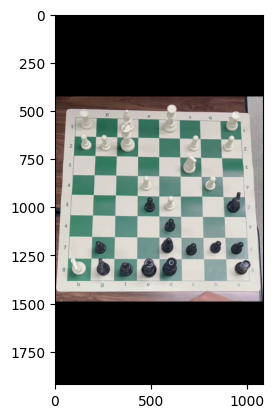

In [ ]:
# Read videos
import editdistance

f = open('chess_solution_final_seen.csv','r')
score = 0
n = 0
for line in f:
  video_name, moves_sol, p,link = line.split(',')
  moves = chess_move(video_name)
  s = 1 - editdistance.eval(moves,moves_sol)  / max(len(moves),len(moves_sol))
  score += s
  print(f"your result: ",moves)
  print(f"solution   : ",moves_sol )
  print(f"The edit distance between your results and solution is {s}.")
  n += 1
f.close()
if n != 0:
  print("-----------------------")
  print("Total score :",score/n)
  print("-----------------------")

